In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = r"\vgsales.csv"
df =  pd.read_csv(file)
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Drop null  values
new_df = df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [6]:
new_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
# Genre of game with sales
grouped_data = new_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].agg('sum')
grouped_data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Adventure,101.93,63.74,51.99,16.70,234.59
Fighting,220.74,100.00,87.15,36.19,444.05
Misc,396.92,211.77,106.67,73.92,789.87
Platform,445.99,200.65,130.65,51.51,829.13
Puzzle,122.01,50.52,56.68,12.47,242.21
Racing,356.93,236.31,56.61,76.68,726.76
Role-Playing,326.50,187.57,350.29,59.38,923.83
Shooter,575.16,310.45,38.18,101.90,1026.20


In [51]:
north_america_data = grouped_data.sort_values(by=('NA_Sales'), ascending=True)
europe_data = grouped_data.sort_values(by=('EU_Sales'), ascending=True)
japan_data = grouped_data.sort_values(by=('JP_Sales'), ascending=True)
other_data = grouped_data.sort_values(by=('Other_Sales'), ascending=True)
global_data = grouped_data.sort_values(by=('Global_Sales'), ascending=True)


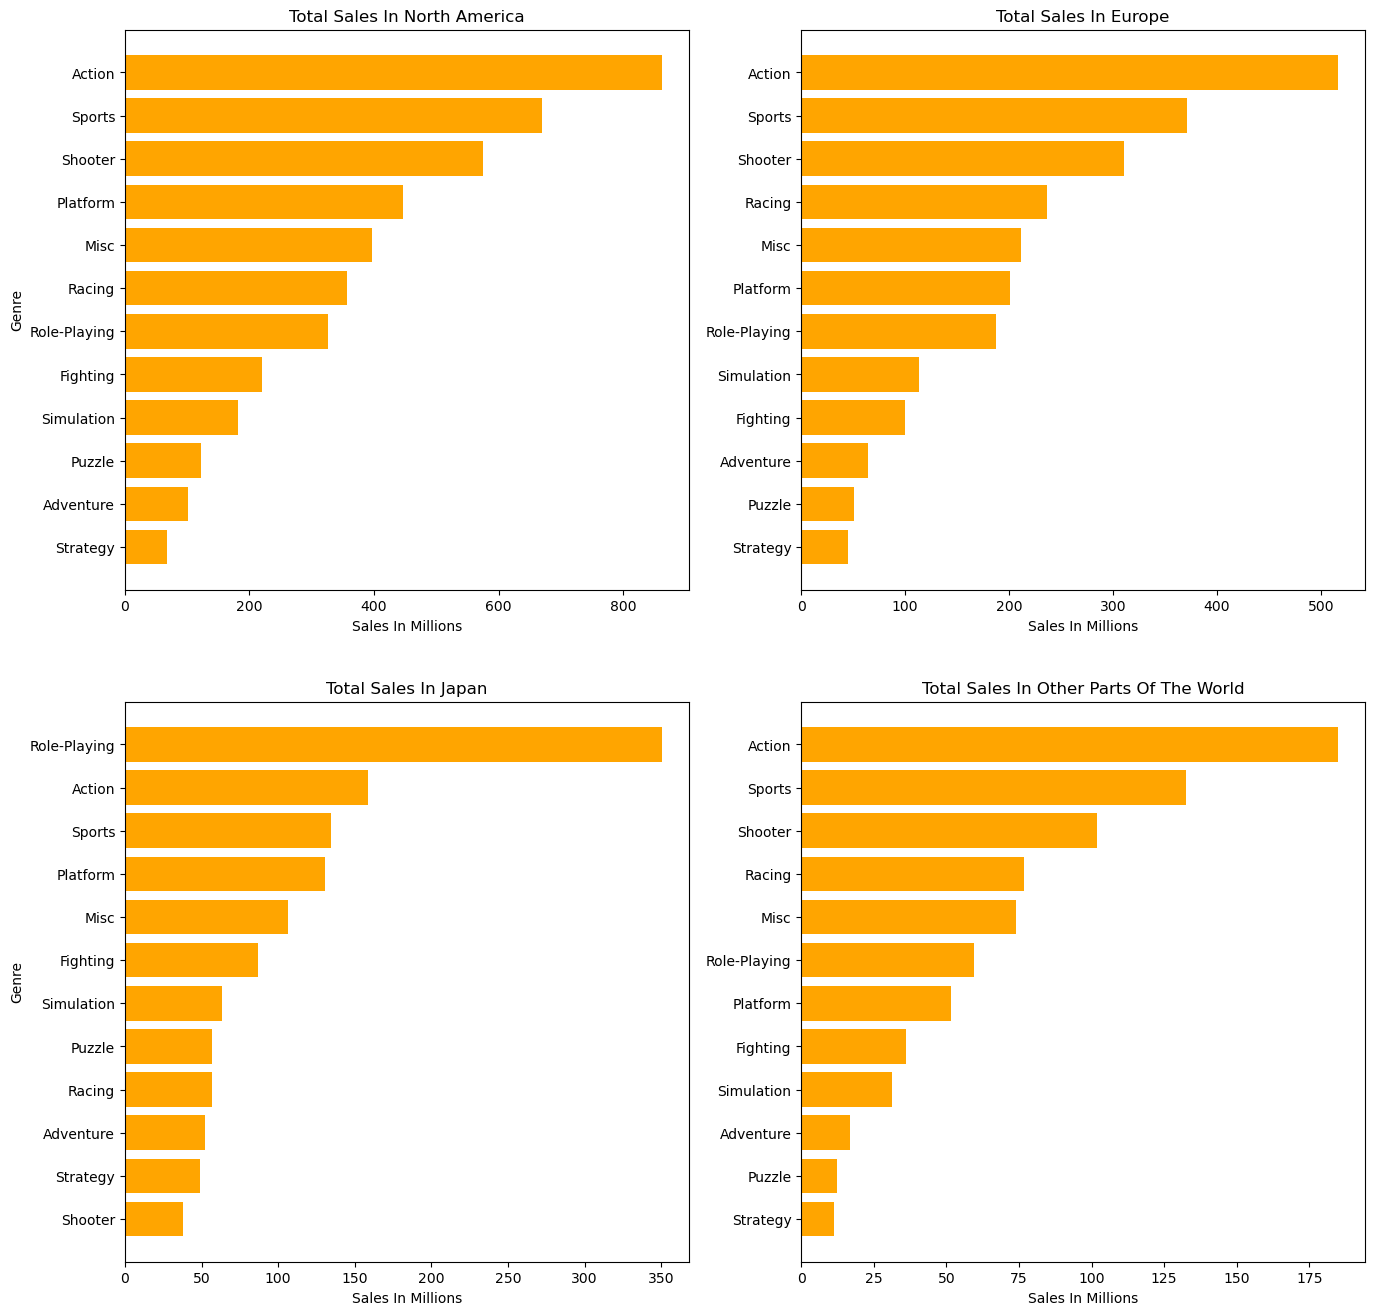

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
ax[0, 0].barh(north_america_data.index, north_america_data['NA_Sales'], color='orange')
ax[0, 0].set_title('Total Sales In North America')
ax[0, 0].set_xlabel('Sales In Millions')
ax[0, 0].set_ylabel('Genre')

ax[0, 1].barh(europe_data.index, europe_data['EU_Sales'], color='orange')
ax[0, 1].set_title('Total Sales In Europe')
ax[0, 1].set_xlabel('Sales In Millions')

ax[1, 0].barh(japan_data.index, japan_data['JP_Sales'], color='orange')
ax[1, 0].set_title('Total Sales In Japan')
ax[1, 0].set_xlabel('Sales In Millions')
ax[1, 0].set_ylabel('Genre')

ax[1, 1].barh(other_data.index, other_data['Other_Sales'], color='orange')
ax[1, 1].set_title('Total Sales In Other Parts Of The World')
ax[1, 1].set_xlabel('Sales In Millions')
plt.show()

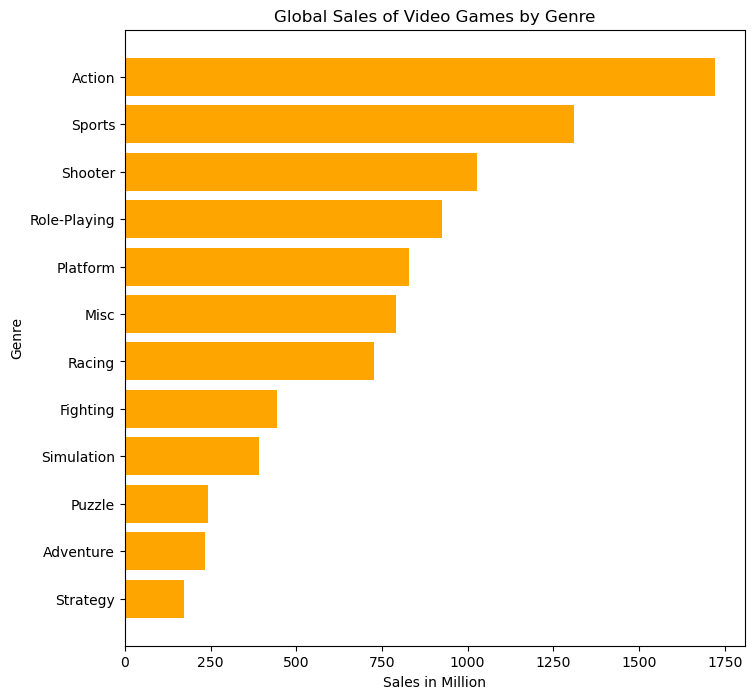

In [53]:
# Global Sales of Video games by Genre

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(global_data.index, global_data['Global_Sales'].sort_values(ascending=True), color='orange')
ax.set_title('Global Sales of Video Games by Genre')
ax.set_xlabel('Sales in Million')
ax.set_ylabel('Genre')
plt.show()